In [11]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
# string operations (hashtags analysis / trending analysis)
# grouping, filtering
# Plotting
# Reshaping (pivot, crosstabs)
# EDA 

In [3]:
path = 'https://github.com/skathirmani/datasets/raw/master/odi-batting.csv'
odi = pd.read_csv(path)
odi.head()

,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL
0,Afghanistan,Mohammad Shahzad,118.0,97.52,2-16-2010,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087
1,Afghanistan,Mohammad Shahzad,110.0,99.09,9-1-2009,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008
2,Afghanistan,Mohammad Shahzad,100.0,138.88,8-16-2010,Cambusdoon New Ground,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3164
3,Afghanistan,Mohammad Shahzad,82.0,75.92,7-10-2010,Hazelaarweg,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3153
4,Afghanistan,Mohammad Shahzad,57.0,100.00,7-1-2010,Sportpark Westvliet,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3135


In [ ]:
# odi.shape # no. of rows & columns
# odi.dytpes # Type of each column
# odi.describe() # summarize individual columns
# odi.head(), odi.tail()

### EDA Steps
- Summarize the data
- Data types
    - Numeric (distribution analysis)
    - Categorical (frequency analysis)
    - Date (Trendina analysis)
    - Text (text analytics)
    - Geographical (Geographical analysis)
    - Misc - email, phone numbers, ids, urls
- Derived metrics / Feature engineering / Mutation
- Univariate analysis
    - Numerical (boxplot, histograms)
    - Categorical (pareto analysis)
    - Text columns (bag of word analysis)
    - Date columns (treat them as categorical columns)
- Bivariate analysis
    - Categorical column vs Numerical column
        - Bar charts, box plots, T-Test, ANNOVA
    - Numerical vs Numerical
        - Correlation plot, pair plot
    - Categorical vs Categorical
        - Cross tab analysis, heatmaps, Chi-square
- Multi variate analysis
    - 2 Cats, 2 num - Hierarachical analysis, treemaps, sunburst
    - Many numerical variables - Scatter plot

In [4]:
odi.head(2)

,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL
0,Afghanistan,Mohammad Shahzad,118.0,97.52,2-16-2010,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087
1,Afghanistan,Mohammad Shahzad,110.0,99.09,9-1-2009,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008


### Data types
- Numerical
    - Runs, Score Rate
- Categorical
    - Country, Ground, Versus
- Dates
    MatchDate
- Text
    - None
- Geographical
    - Country, Ground, Versus
- Misc
    - URL

### Derived Metrics
- Date
    - day, month, year, dayofweek
- Country, Ground
    - Lat, long
- Runs
    - Runs binning
    - Century, Fifty, Missed century

### Frequency analysis

In [5]:
odi['Player'].nunique()

1936

In [8]:
odi['Player'].unique()

array(['Mohammad Shahzad', 'Mohammad Nabi', 'Nawroz Mangal', ...,
       'Waddington Mwayenga', 'Tafadzwa Kamungozi', 'Njabulo Ncube'],
      dtype=object)

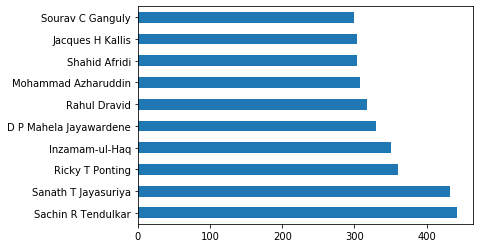

In [13]:
# Identifies unique values
# Computes frequency of each unique value
# Sort the results in the descending order of frequency
odi['Player'].value_counts().head(10).plot.barh()

### Numerical analysis

In [14]:
odi['Runs'].describe()

count    55900.000000
mean        22.241413
std         25.558363
min          0.000000
25%          4.000000
50%         13.000000
75%         32.000000
max        200.000000
Name: Runs, dtype: float64

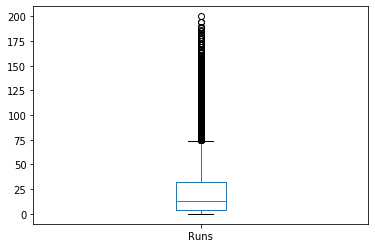

In [16]:
odi['Runs'].plot.box()

In [ ]:
#apply, lambda

In [31]:
def check_if_century(run):
    if run > 99:
        return 1
    else:
        return 0

In [32]:
check_if_century = lambda run: 1 if run>99 else 0

In [19]:
check_if_century(105)

1

In [33]:
odi['is_century'] = odi['Runs'].apply(check_if_century)

In [35]:
odi['is_century'] = odi['Runs'].apply(lambda run: 1 if run>99 else 0)

In [36]:
odi['is_century'].sum()

1161

In [37]:
# Top 10 players based on total number of centuries
players_centuries = odi.groupby(['Player']).agg({'is_century': sum})
top_players = players_centuries.sort_values(by='is_century',
                                            ascending=False).head(10)
#top_players['is_century'].plot.barh()

In [ ]:
# Calculate top 10 players based on missed centuries
#run: (run>90) and (run<100)

In [42]:
odi['is_duck'] = odi['Runs'].apply(lambda run: 1 if run==0 else 0)
odi['is_missed_century'] = odi['Runs'].apply(
    lambda run: 1 if (run>90) and (run<100) else 0)
odi['is_fifty'] = odi['Runs'].apply(
    lambda run: 1 if (run>49) and (run<100) else 0)

In [ ]:
# min runs, max run, avg runs, median runs

In [44]:
odi.groupby(['Player']).agg({
    'Runs': [min, max, sum, 'mean'],
    'ScoreRate': 'mean',
    'is_century': sum,
    'is_duck': sum,
    'is_missed_century': sum,
    'is_fifty': sum
}).head(1)

Runs                    ScoreRate is_century is_duck  \
              min   max   sum   mean      mean        sum     sum   
Player                                                              
Aamer Hanif  17.0  36.0  89.0  22.25    70.295          0       0   

            is_missed_century is_fifty  
                          sum      sum  
Player                                  
Aamer Hanif                 0        0

In [108]:
players_summary = odi.groupby(['Player']).agg(
    Min_Runs=('Runs', min),
    Max_Runs=('Runs', max),
    Avg_Runs=('Runs', 'mean'),
    Total_Runs=('Runs', sum),
    ScoreRate= ('ScoreRate', 'mean'),
    Centuries=('is_century', sum),
    Ducks=('is_duck', sum),
    Missed_Centuries=('is_missed_century',sum),
    Fifties=('is_fifty', sum),
)
top_players = players_summary.sort_values(by='Total_Runs',
                            ascending=False).head(10)

top_players.style.background_gradient(cmap='Blues').format("{:.0f}")

,Min_Runs,Max_Runs,Avg_Runs,Total_Runs,ScoreRate,Centuries,Ducks,Missed_Centuries,Fifties
Player,,,,,,,,,
Sachin R Tendulkar,0,200,41,18111,75,48,20,17,95
Ricky T Ponting,0,164,38,13686,70,30,20,5,82
Sanath T Jayasuriya,0,189,31,13430,78,28,34,6,68
Inzamam-ul-Haq,0,137,34,11739,67,10,20,2,83
Jacques H Kallis,0,139,38,11372,64,17,17,8,84
Sourav C Ganguly,0,183,38,11363,65,22,16,3,72
Rahul Dravid,0,153,34,10889,67,12,13,3,83
Brian C Lara,0,169,36,10405,71,19,16,3,63
D P Mahela Jayawardene,0,144,30,9913,65,15,26,3,60


In [70]:
#pd.__version__

### Filtering

In [ ]:
### single column single value
### Single column mulitple value
### Multiple columns filtering

In [101]:
odi.shape

(55926, 12)

In [105]:
# Single column single value
player = 'Sachin R Tendulkar'
sachin = odi[odi['Player'] == player]
sachin.shape

(442, 12)

In [106]:
# single column multiple values
players = ['Sachin R Tendulkar', 'Rahul Dravid']
odi_subset = odi[odi['Player'].isin(players)]
odi_subset.shape

(760, 12)

In [109]:
# multiple columns filtering
player = 'Sachin R Tendulkar'

sachin_centuries = odi[(odi['Player'] == player) &
                       (odi['Runs'] > 99)]
sachin_centuries.shape

(48, 12)

In [ ]:
## Filter for
## player -> Sachin R Tendulkar
## Versus -> Australia
## Ground -> Sharjah CA Stadium
## Runs -> less than 10

In [111]:
odi[(odi['Player'] == 'Sachin R Tendulkar') &
    (odi['Ground'] == 'Sharjah CA Stadium') &
    (odi['Runs'] < 10) &
    (odi['Versus'] == 'Australia')].shape

(1, 12)

## String Operations

In [113]:
url = 'https://github.com/skathirmani/datasets/raw/master/narendramodi_tweets.csv'
tweets = pd.read_csv(url)
tweets.shape

(3220, 14)

In [115]:
# twitter developer account
# tweepy - REST API, Streaming API

In [119]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'],
                                     format="%Y-%m-%d %H:%M:%S",
                                     )

In [121]:
tweets['created_at'].min(), tweets['created_at'].max()

(Timestamp('2016-03-09 12:22:10'), Timestamp('2017-01-31 11:00:07'))

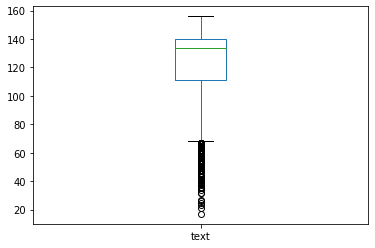

In [152]:
# Distribution of number of characters
tweets['text'].str.len().plot.box()

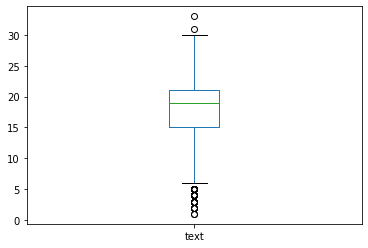

In [155]:
# Distribution of no. of words per tweet
#tweets['text'].str.split('\s').apply(lambda v: len(v))
tweets['text'].str.split('\s').str.len().plot.box()

In [166]:
rows_words = tweets['text'].str.lower().str.split('\s').values.tolist()
## Word frequency
## Top 10 words based on their frequency
## For loop, append/extend
## Frequency count

In [ ]:
## Top 10 hashtags along with their frequency

In [ ]:
words_all = []

In [161]:
pd.Series([10, 30, 50, 60]).values.tolist()

[10, 30, 50, 60]